# Завдання 1

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [63]:
path_data_2d = "data/data_2d.csv"
path_mnist = "data/mnist.csv"

In [64]:
data_2d = pd.read_csv(path_data_2d)
mnist = pd.read_csv(path_mnist)

In [65]:
K = range(1, 11)

In [66]:
def k_means(frame):
    inertia = []
    for k in K:
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        inertia.append(k_meanModel.inertia_)

    return inertia

In [67]:
def show_k(inertia):
    plt.figure(figsize=(10,4))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

Візуалізуємо ліктевий метод для data_2d:

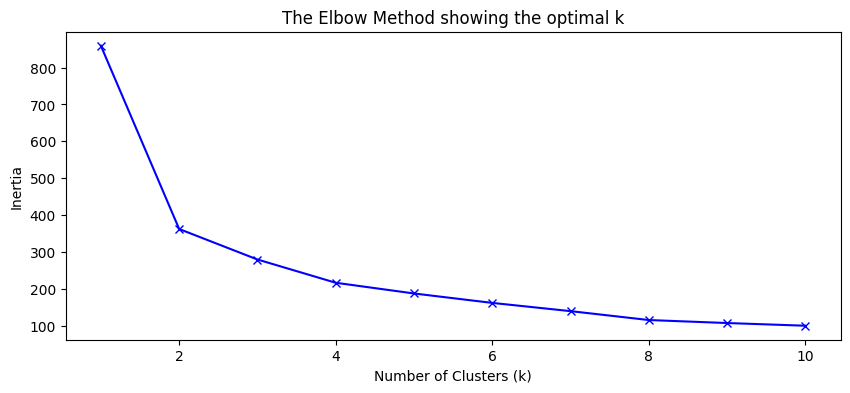

In [68]:
show_k(k_means(data_2d))

Оптимальна кількість кластерів для data_2d - 2

Візуалізуємо ліктевий метод для mnist:

Зменшуємо розмірність даних до 2-вимірного варіанту:

In [69]:
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)

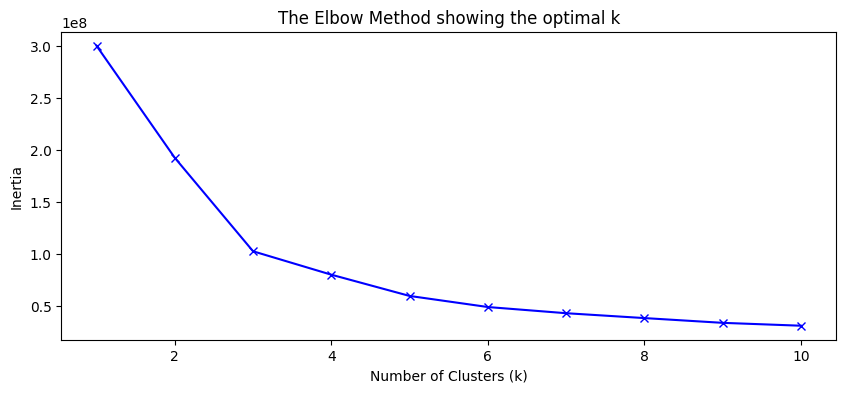

In [70]:
show_k(k_means(mnist_2d))

Оптимальна кількість кластерів для mnist_2d - 3

# Завдання 2

In [71]:
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)

    plt.figure(figsize=(10,4))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

Візуалізуємо результат роботи кластеризації data_2d:

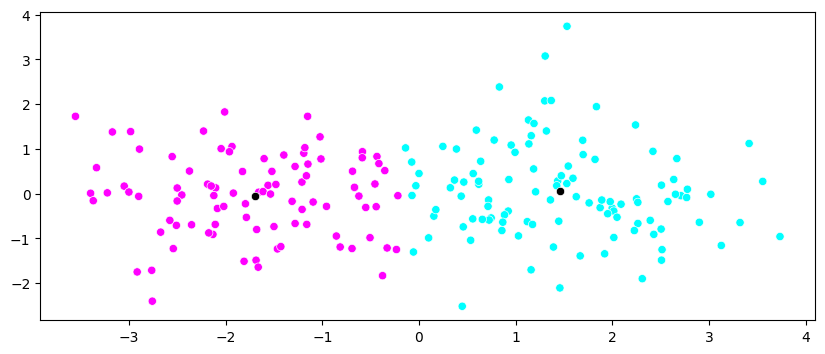

In [72]:
show_clustering(pca.fit_transform(data_2d), 2)

Візуалізуємо результат роботи кластеризації mnist_2d:

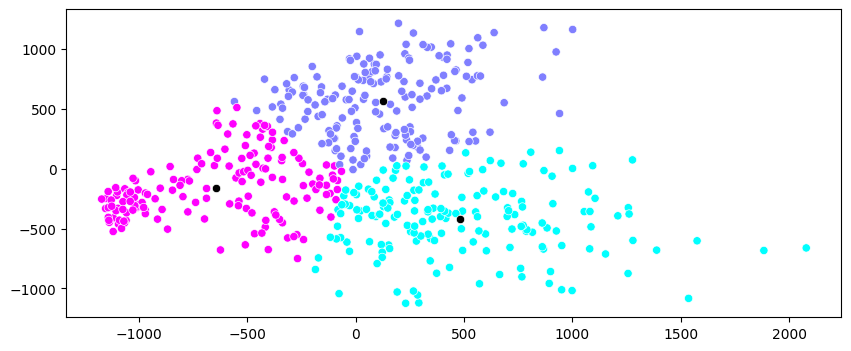

In [73]:
show_clustering(mnist_2d, 3)